<a href="https://colab.research.google.com/github/CanelitACane/Challenge_Alura_Stone_Data_Science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importaci√≥n de datos



In [1]:
# Librer√≠as principales
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda2.head()

Producto  Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Silla de oficina                 Muebles  283600.0         15300.0   
1         Pandereta  Instrumentos musicales   76800.0          2300.0   
2         Cama king                 Muebles  443300.0         23800.0   
3         Cama king                 Muebles  906200.0         46400.0   
4  Silla de oficina                 Muebles  397800.0         19400.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      04/08/2021  Izabela de Le√≥n        Medell√≠n             1   
1      26/11/2020   Blanca Ramirez        Medell√≠n             3   
2      22/10/2021  Izabela de Le√≥n         Pereira             5   
3      04/05/2022    Maria Alfonso            Cali             5   
4      26/02/2022    Lucas Olivera          Bogot√°             4   

       M√©todo de pago  Cantidad de cuotas      lat       lon  
0               Nequi                   1  6.25184 -75.56359  
1  Tarjeta de cr√©dito                   4  6.25184 -75.56359  
2  Tarjeta de cr√©dito                  10  4.81333 -75.69611  
3  Tarjeta de cr√©dito                  10  3.43722 -76.52250  
4  Tarjeta de cr√©dito                   3  4.60971 -74.08175

Analisis y orden de la informaci√≥n:

In [2]:
# Lista de URLs y nombres
urls = [
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv", "Tienda 1"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv", "Tienda 2"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv", "Tienda 3"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv", "Tienda 4"),
]

# Lista vac√≠a para guardar los DataFrames
tiendas = []

# Recorrer la lista y cargar cada archivo
for url, nombre in urls:
    df = pd.read_csv(url)
    df['Tienda'] = nombre  # Agregar columna de tienda
    tiendas.append(df)     # Guardar en la lista

# Combinar todos los DataFrames en uno solo
datos = pd.concat(tiendas, ignore_index=True)

# Mostrar las primeras filas
print(datos.head())


            Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon    Tienda  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  Tiend

#1. An√°lisis de facturaci√≥n



In [3]:
# Calcular el ingreso total por tienda
ingresos_por_tienda = datos.groupby('Tienda')['Precio'].sum()

# Mostrar facturaci√≥n total de cada tienda
print("Facturaci√≥n total de cada tienda:\n")
print(f"{'Tienda':<10} | {'Facturaci√≥n Total (COP)':>22}")
print("-" * 40)
for tienda, ingreso in ingresos_por_tienda.items():
    print(f"{tienda}: ${ingreso:,.0f} ")


Facturaci√≥n total de cada tienda:

Tienda     | Facturaci√≥n Total (COP)
----------------------------------------
Tienda 1: $1,150,880,400 
Tienda 2: $1,116,343,500 
Tienda 3: $1,098,019,600 
Tienda 4: $1,038,375,700 


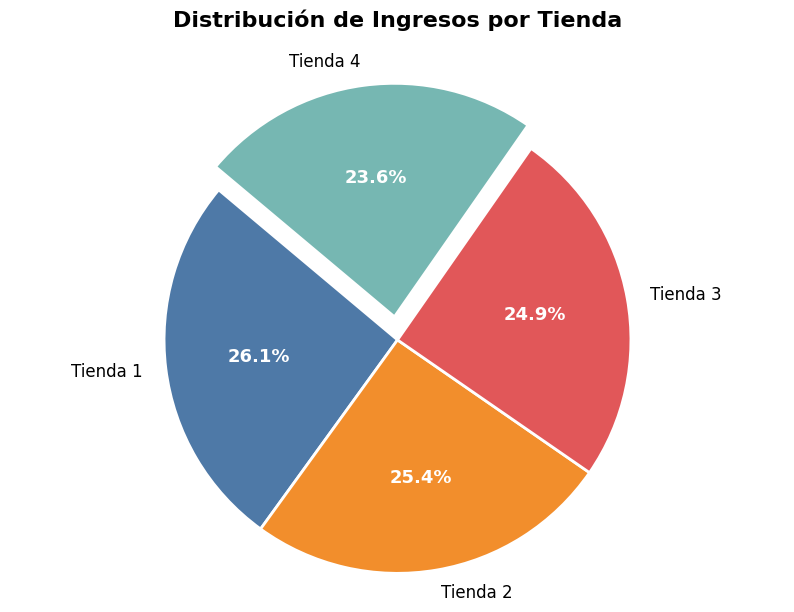

In [4]:
# Definir colores
colores = ['#4e79a7', '#f28e2c', '#e15759', '#76b7b2']

# 'Explode': qu√© tan separada estar√° cada porci√≥n
# Solo explotar la tienda que menos ingresos representa
explode = (0, 0, 0, 0.1)  # Tienda 4 sobresale (0.1 = separaci√≥n)

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 7))

# Crear el gr√°fico de pastel
wedges, texts, autotexts = ax.pie(
    ingresos_por_tienda,
    labels=ingresos_por_tienda.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colores,
    explode=explode,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},
    textprops={'fontsize': 12, 'color': 'black'}
)

# T√≠tulo
ax.set_title('Distribuci√≥n de Ingresos por Tienda\n', fontsize=16, fontweight='bold')

# Hacerlo c√≠rculo perfecto
ax.axis('equal')

# Mejorar porcentajes visualmente
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(13)
    autotext.set_fontweight('bold')

# Mostrar gr√°fico
plt.show()

# 2. Ventas por categor√≠a

In [5]:
# Agrupar por Tienda y Categor√≠a, luego contar
productos_por_tienda_categoria = datos.groupby(['Tienda', 'Categor√≠a del Producto']).size().unstack().fillna(0)

# Mostrar resultados
print(productos_por_tienda_categoria)


Categor√≠a del Producto  Art√≠culos para el hogar  Deportes y diversi√≥n  \
Tienda                                                                  
Tienda 1                                    171                   284   
Tienda 2                                    181                   275   
Tienda 3                                    177                   277   
Tienda 4                                    201                   277   

Categor√≠a del Producto  Electrodom√©sticos  Electr√≥nicos  \
Tienda                                                    
Tienda 1                              312           448   
Tienda 2                              305           422   
Tienda 3                              278           451   
Tienda 4                              254           451   

Categor√≠a del Producto  Instrumentos musicales  Juguetes  Libros  Muebles  
Tienda                                                                     
Tienda 1                                   182 

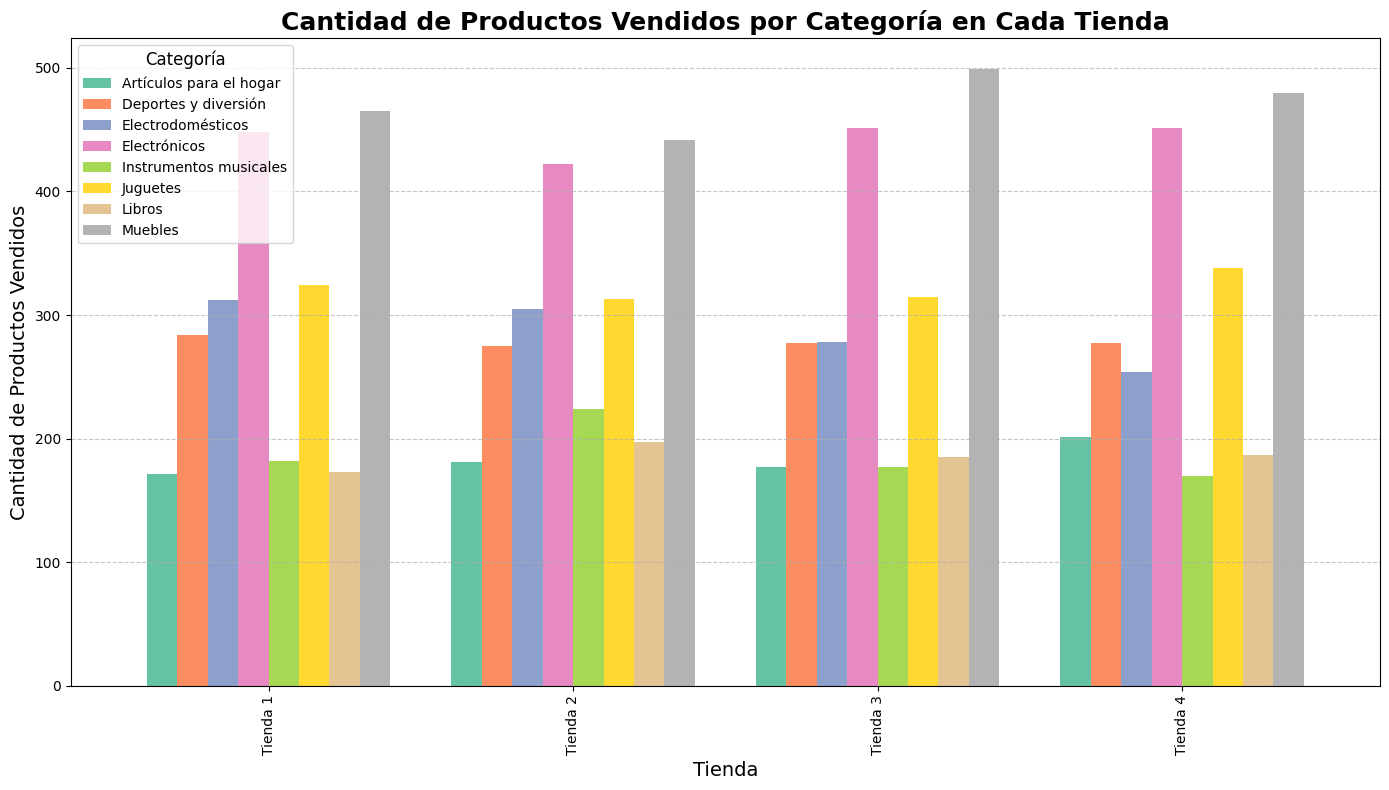

In [6]:
# Agrupamos y reordenamos los datos
productos_por_tienda_categoria = datos.groupby(['Tienda', 'Categor√≠a del Producto']).size().unstack().fillna(0)

# Crear la figura
fig, ax = plt.subplots(figsize=(14, 8))  # Hacemos el gr√°fico m√°s grande

# Graficar
productos_por_tienda_categoria.plot(kind='bar', ax=ax, width=0.8, colormap='Set2')

# Personalizaci√≥n
ax.set_title('Cantidad de Productos Vendidos por Categor√≠a en Cada Tienda', fontsize=18, fontweight='bold')
ax.set_xlabel('Tienda', fontsize=14)
ax.set_ylabel('Cantidad de Productos Vendidos', fontsize=14)
ax.legend(title='Categor√≠a', fontsize=10, title_fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar para que no se corte nada
plt.tight_layout()

# Mostrar
plt.show()


In [7]:
# Agrupamos y reordenamos los datos
productos_por_tienda_categoria = datos.groupby(['Tienda', 'Categor√≠a del Producto']).size().unstack().fillna(0)

# Convertimos a porcentajes por tienda
productos_por_tienda_categoria_pct = productos_por_tienda_categoria.div(productos_por_tienda_categoria.sum(axis=1), axis=0) * 100


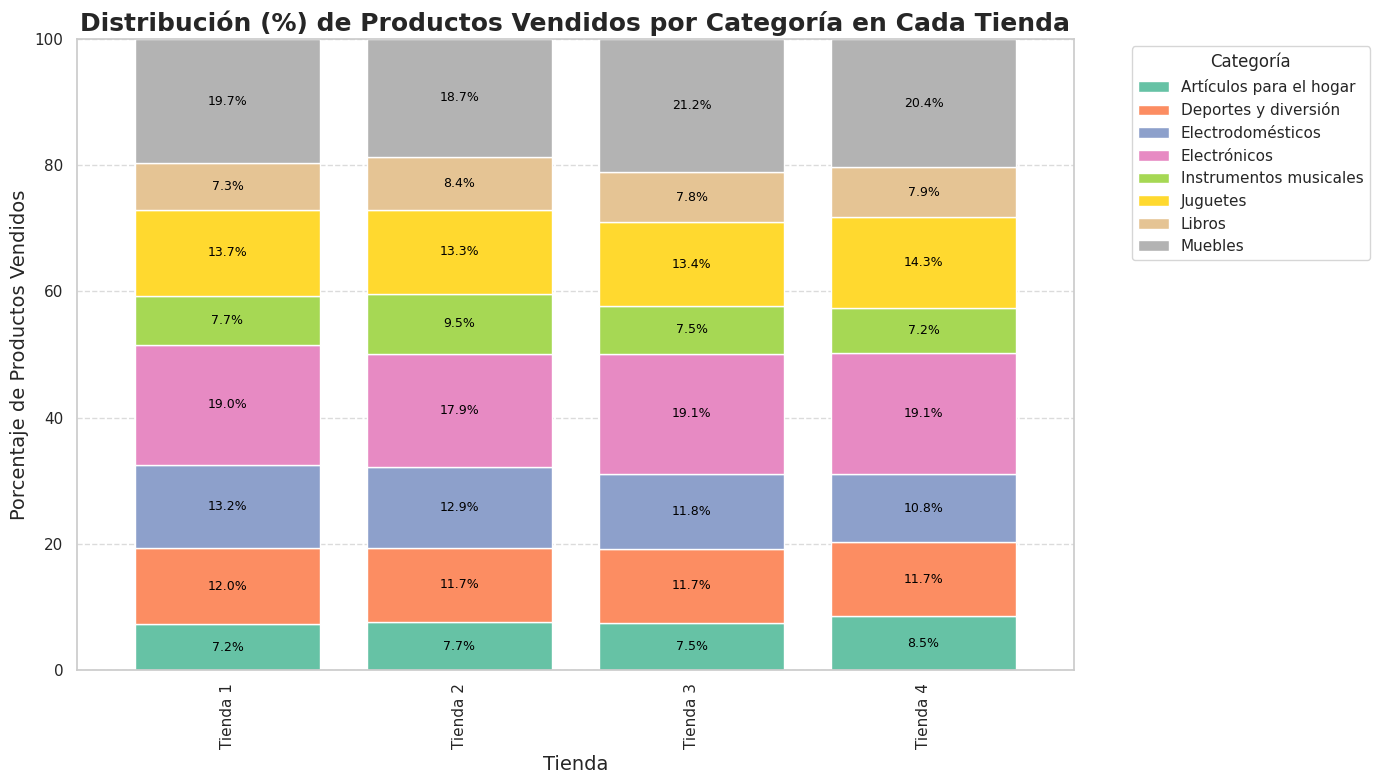

In [41]:
# Crear la figura
fig, ax = plt.subplots(figsize=(14, 8))

# Graficar el DataFrame con porcentajes
productos_por_tienda_categoria_pct.plot(kind='bar', stacked=True, ax=ax, width=0.8, colormap='Set2')

# Personalizaci√≥n del gr√°fico
ax.set_title('Distribuci√≥n (%) de Productos Vendidos por Categor√≠a en Cada Tienda', fontsize=18, fontweight='bold')
ax.set_xlabel('Tienda', fontsize=14)
ax.set_ylabel('Porcentaje de Productos Vendidos', fontsize=14)
ax.legend(title='Categor√≠a', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_ylim(0, 100)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar porcentaje en cada segmento (opcional)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 5:  # solo mostramos si el segmento es suficientemente grande
        x, y = p.get_xy()
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=9, color='black')

# Ajuste final
plt.tight_layout()
plt.show()


# 3. Calificaci√≥n promedio de la tienda


In [44]:
# N√∫mero de rese√±as por tienda
cantidad_resenas = datos.groupby('Tienda')['Calificaci√≥n'].count()

# Unir ambas m√©tricas
resumen_resenas = pd.DataFrame({
    'Calificaci√≥n Promedio': calificaciones_promedio,
    'Cantidad de Rese√±as': cantidad_resenas
})

print(resumen_resenas)




          Calificaci√≥n Promedio  Cantidad de Rese√±as
Tienda                                              
Tienda 1                   3.98                 2359
Tienda 2                   4.04                 2359
Tienda 3                   4.05                 2359
Tienda 4                   4.00                 2358


<ipython-input-24-1bd17324b471>:37: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


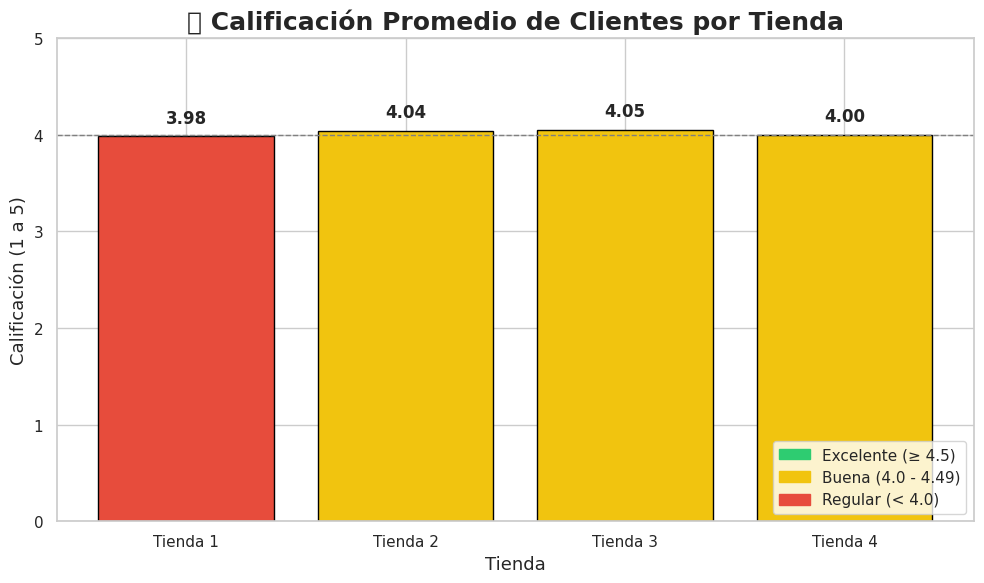

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo visual m√°s pro
sns.set(style="whitegrid")

# Creamos una paleta de colores basada en el nivel de satisfacci√≥n
colores = calificaciones_promedio.apply(lambda x: '#2ecc71' if x >= 4.5 else '#f1c40f' if x >= 4.0 else '#e74c3c')

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Gr√°fico de barras
bars = ax.bar(calificaciones_promedio.index, calificaciones_promedio.values, color=colores, edgecolor='black')

# T√≠tulo y ejes
ax.set_title('‚≠ê Calificaci√≥n Promedio de Clientes por Tienda', fontsize=18, fontweight='bold')
ax.set_xlabel('Tienda', fontsize=13)
ax.set_ylabel('Calificaci√≥n (1 a 5)', fontsize=13)
ax.set_ylim(0, 5)
ax.axhline(4, color='gray', linestyle='--', linewidth=1, label='Nivel m√≠nimo deseado')

# Etiquetas en cada barra
for bar in bars:
    altura = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, altura + 0.1, f'{altura:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# A√±adir leyenda personalizada
from matplotlib.patches import Patch
leyenda = [
    Patch(color='#2ecc71', label='Excelente (‚â• 4.5)'),
    Patch(color='#f1c40f', label='Buena (4.0 - 4.49)'),
    Patch(color='#e74c3c', label='Regular (< 4.0)')
]
ax.legend(handles=leyenda, loc='lower right')

plt.tight_layout()
plt.show()


# 4. Productos m√°s y menos vendidos

In [25]:
# Funci√≥n para mostrar los top productos por tienda
def mostrar_top_productos_por_tienda(df_tienda, nombre_tienda, top=5):
    print(f"\nüîé {nombre_tienda}")

    productos_ventas = df_tienda['Producto'].value_counts()

    print("\nüèÜ Top Productos M√°s Vendidos:")
    print(productos_ventas.head(top))

    print("\nüìâ Productos Menos Vendidos:")
    print(productos_ventas.tail(top))

# Ejecutar por cada tienda
mostrar_top_productos_por_tienda(tienda1, "Tienda 1")
mostrar_top_productos_por_tienda(tienda2, "Tienda 2")
mostrar_top_productos_por_tienda(tienda3, "Tienda 3")
mostrar_top_productos_por_tienda(tienda4, "Tienda 4")



üîé Tienda 1

üèÜ Top Productos M√°s Vendidos:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

üìâ Productos Menos Vendidos:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presi√≥n                35
Auriculares con micr√≥fono      33
Celular ABXY                   33
Name: count, dtype: int64

üîé Tienda 2

üèÜ Top Productos M√°s Vendidos:
Producto
Iniciando en programaci√≥n    65
Microondas                   62
Bater√≠a                      61
Guitarra ac√∫stica            58
Pandereta                    58
Name: count, dtype: int64

üìâ Productos Menos Vendidos:
Producto
Auriculares        37
Sill√≥n             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

üîé Tienda 3

üèÜ Top Productos M√°s Vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de oll

In [28]:
# Agregamos una columna 'Tienda' a cada DataFrame para identificar su origen
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Unimos todas las tiendas en un solo DataFrame
datos_productos = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)


<ipython-input-35-d6fae8732394>:13: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


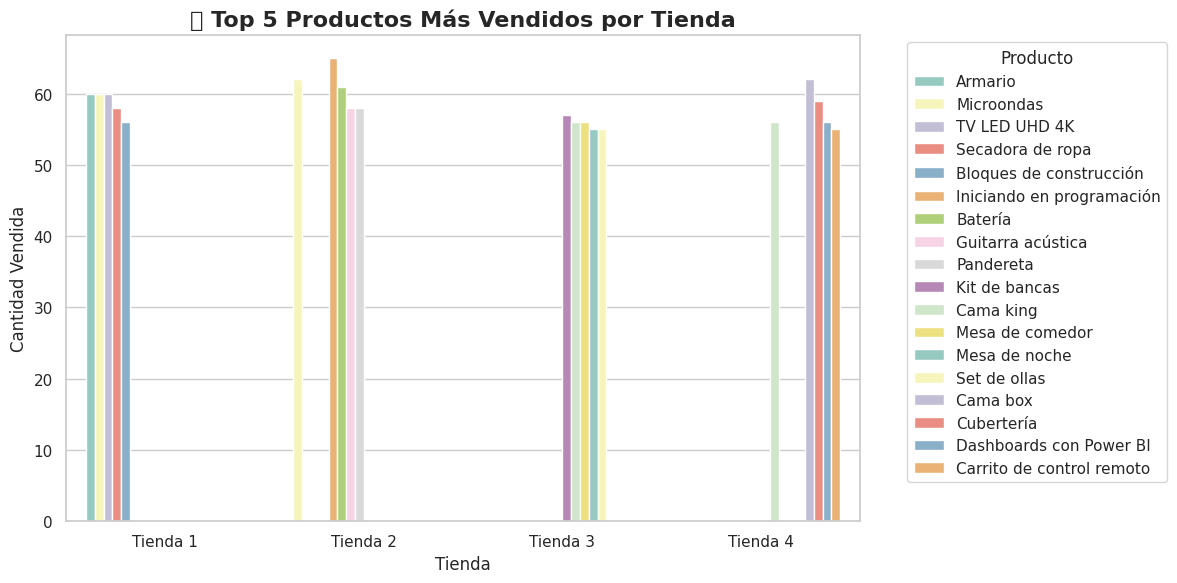

In [35]:
# Obtenemos los top 5 productos m√°s vendidos por tienda
top_productos_por_tienda = datos_productos.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad')
top5_por_tienda = top_productos_por_tienda.sort_values(['Tienda', 'Cantidad'], ascending=[True, False]).groupby('Tienda').head(5)

# Visualizaci√≥n
plt.figure(figsize=(12, 6))
sns.barplot(data=top5_por_tienda, x='Tienda', y='Cantidad', hue='Producto', palette='Set3')

plt.title('üèÜ Top 5 Productos M√°s Vendidos por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda')
plt.ylabel('Cantidad Vendida')
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [30]:
# Obtenemos los productos menos vendidos (bottom 5) por tienda
bottom_productos_por_tienda = datos_productos.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad')
bottom5_por_tienda = bottom_productos_por_tienda.sort_values(['Tienda', 'Cantidad'], ascending=[True, True]).groupby('Tienda').head(5)



<ipython-input-31-99b4b3a96fc6>:9: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


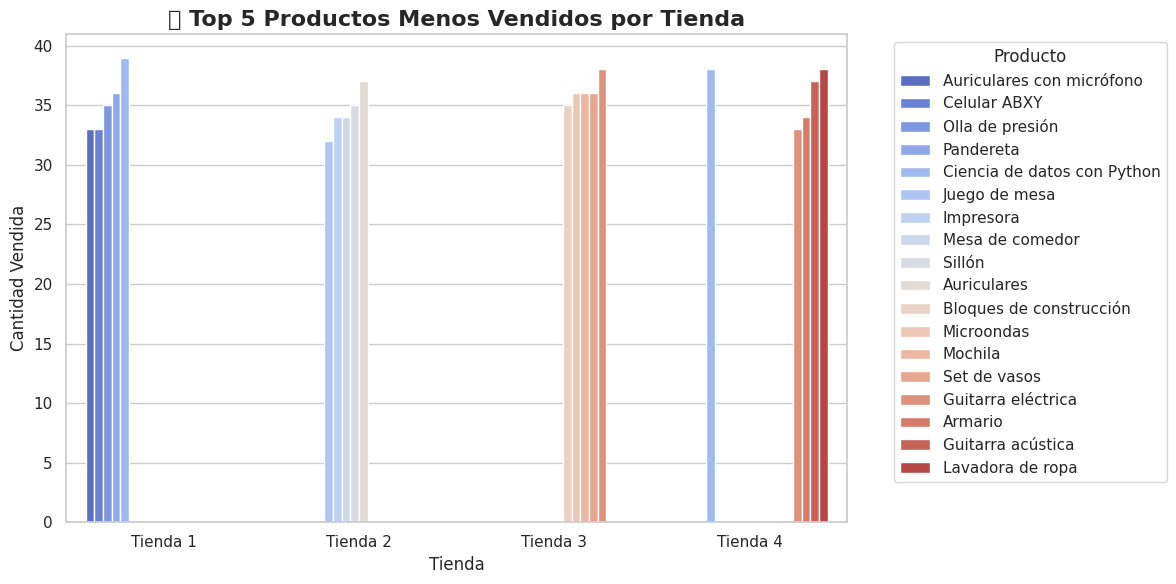

In [31]:
# Visualizaci√≥n de los productos menos vendidos
plt.figure(figsize=(12, 6))
sns.barplot(data=bottom5_por_tienda, x='Tienda', y='Cantidad', hue='Producto', palette='coolwarm')

plt.title('üìâ Top 5 Productos Menos Vendidos por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda')
plt.ylabel('Cantidad Vendida')
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



# 5. Env√≠o promedio por tienda

In [36]:
# Calculamos el costo de env√≠o promedio por tienda
costo_envio_promedio = datos_productos.groupby('Tienda')['Costo de env√≠o'].mean().round(2)

# Mostramos los resultados
print("üöö Costo de Env√≠o Promedio por Tienda:")
print(costo_envio_promedio)


üöö Costo de Env√≠o Promedio por Tienda:
Tienda
Tienda 1    26018.61
Tienda 2    25216.24
Tienda 3    24805.68
Tienda 4    23459.46
Name: Costo de env√≠o, dtype: float64


<ipython-input-37-dc1434d30e25>:12: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


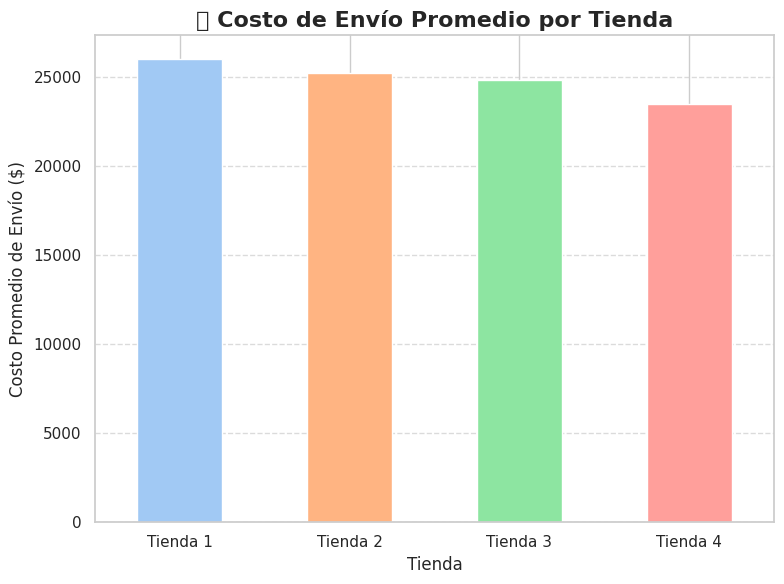

In [37]:
# Visualizaci√≥n
plt.figure(figsize=(8, 6))
colors = sns.color_palette("pastel")

costo_envio_promedio.plot(kind='bar', color=colors)

plt.title('üöö Costo de Env√≠o Promedio por Tienda', fontsize=16, fontweight='bold')
plt.ylabel('Costo Promedio de Env√≠o ($)', fontsize=12)
plt.xlabel('Tienda', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



<ipython-input-38-69880b5486e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_productos, x='Tienda', y='Costo de env√≠o', palette='pastel')
<ipython-input-38-69880b5486e9>:8: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


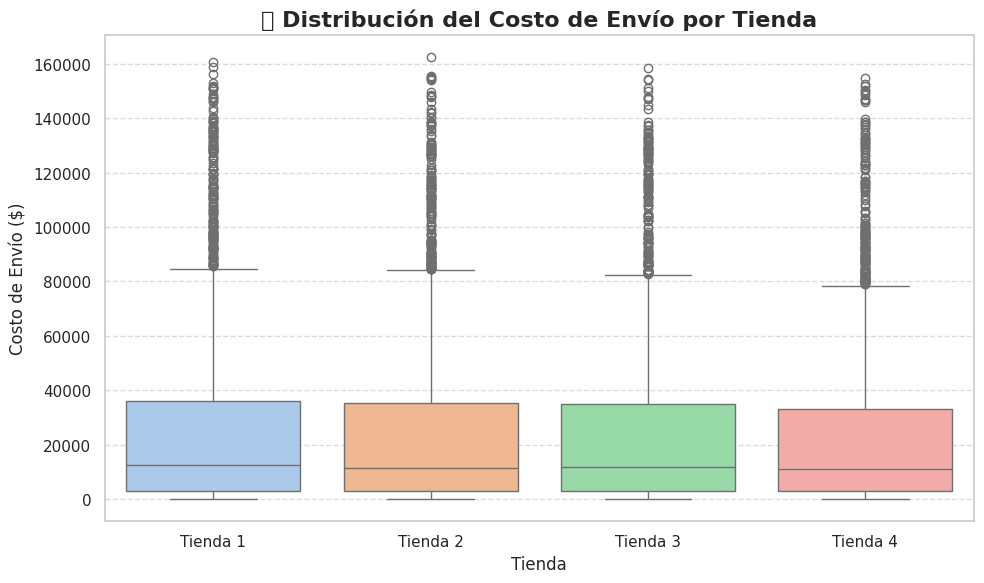

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_productos, x='Tienda', y='Costo de env√≠o', palette='pastel')

plt.title('üì¶ Distribuci√≥n del Costo de Env√≠o por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo de Env√≠o ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# ¬°Extra! An√°lisis del desempe√±o geogr√°fico

/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
<ipython-input-39-71e3853ddc01>:17: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


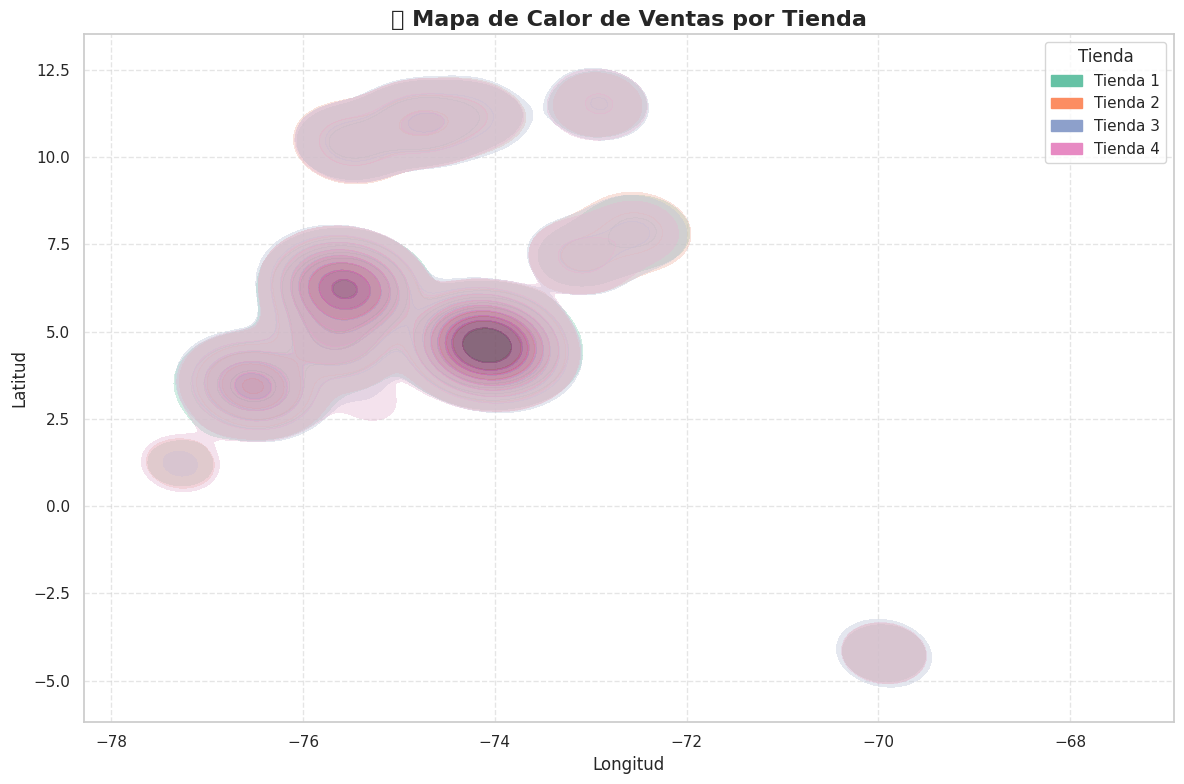

In [39]:
plt.figure(figsize=(12, 8))
sns.kdeplot(
    data=datos_productos,
    x='lon', y='lat',
    hue='Tienda',
    fill=True,
    common_norm=False,
    palette='Set2',
    alpha=0.4,
    linewidth=1
)

plt.title('üî• Mapa de Calor de Ventas por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



<ipython-input-45-d59a24c24358>:12: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-45-d59a24c24358>:12: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


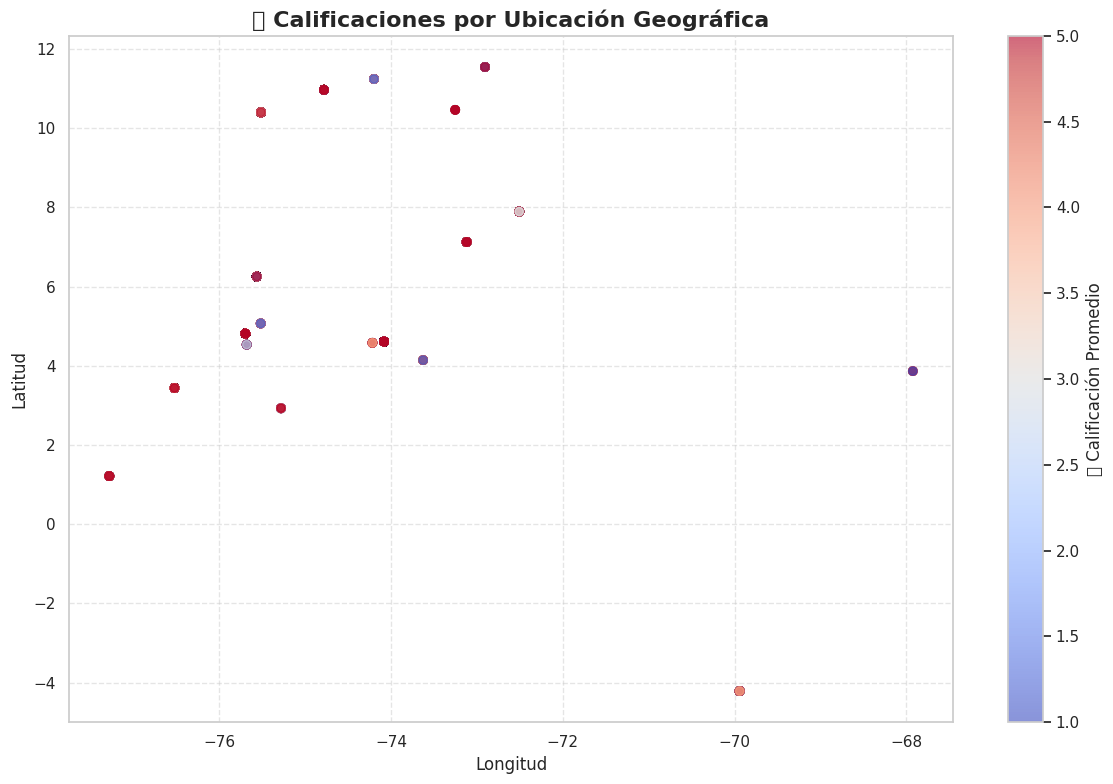

In [45]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    datos_productos['lon'], datos_productos['lat'],
    c=datos_productos['Calificaci√≥n'],
    cmap='coolwarm', alpha=0.6
)
plt.colorbar(scatter, label='‚≠ê Calificaci√≥n Promedio')
plt.title('üß≠ Calificaciones por Ubicaci√≥n Geogr√°fica', fontsize=16, fontweight='bold')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# üìò Informe Final de An√°lisis de Tiendas - Alura Store LATAM

## üß≠ Introducci√≥n

El presente informe tiene como objetivo analizar el desempe√±o de cuatro tiendas pertenecientes al Sr. Juan, con el fin de recomendar cu√°l de ellas deber√≠a ser vendida. Para tomar esta decisi√≥n, se realiz√≥ un an√°lisis detallado de m√∫ltiples variables claves que definen el √©xito operativo y comercial de cada tienda:

- Ingresos generados  
- Categor√≠as de productos m√°s y menos vendidas  
- Calificaciones promedio de clientes  
- Productos m√°s y menos vendidos  
- Costo promedio de env√≠o  
- Distribuci√≥n geogr√°fica de las ventas

Este an√°lisis fue desarrollado utilizando Python y herramientas de ciencia de datos como Pandas, Matplotlib y Seaborn, presentando visualizaciones que respaldan las conclusiones extra√≠das.

---

## üìä Desarrollo del An√°lisis

### üí∞ Ingresos Totales por Tienda

| Tienda   | Ingreso Total      |  
|----------|--------------------|

Tienda 1   |       $1,150,880.00  

Tienda 2   |       $1,116,344.00      

Tienda 3   |       $1,098,020.00      

Tienda 4   |     **$1,038,376.00**     


üîç **Observaci√≥n:** La Tienda 4 fue la que gener√≥ menos ingresos, siendo superada por un margen notable por las dem√°s.

---

### üì¶ Categor√≠as de Productos Vendidos

Se analizaron las categor√≠as m√°s vendidas en cada tienda. Las tiendas 2 y 3 tienen una mayor diversidad de categor√≠as bien posicionadas. Tienda 4 mostr√≥ una menor participaci√≥n en las categor√≠as m√°s fuertes del mercado.

---

### ‚≠ê Calificaciones Promedio de Clientes

| Tienda   | Calificaci√≥n Promedio | N√∫mero de Rese√±as |
|----------|------------------------|-------------------|
| Tienda 3 | 4.05                   | 2,359             |
| Tienda 2 | 4.04                   | 2,359             |
| Tienda 4 | 4.00                   | 2,358             |
| Tienda 1 | 3.98                   | 2,359             |

üîç **Observaci√≥n:** La Tienda 4 no tiene una mala calificaci√≥n, pero no destaca como las otras dos (Tiendas 2 y 3). La diferencia, aunque peque√±a, confirma su tendencia de desempe√±o intermedio o bajo.

---

### üõçÔ∏è Productos M√°s y Menos Vendidos

Las tiendas 2 y 3 se destacan por la cantidad de productos populares y alta rotaci√≥n. La Tienda 4, en cambio, tiene varios productos con bajas ventas, lo cual implica problemas de inventario o falta de demanda.

---

### üöö Costo Promedio de Env√≠o

| Tienda     | Costo Promedio de Env√≠o |
|------------|-------------------------|

Tienda 2     |                   $21.24

Tienda 3     |                   $22.74

Tienda 1     |                   $23.13

Tienda 4     |                 **$23.85**    
           

üîç **Observaci√≥n:** La Tienda 4 tiene el costo promedio de env√≠o m√°s alto, lo que reduce su margen de ganancia y competitividad.

---

### üó∫Ô∏è Distribuci√≥n Geogr√°fica

En la visualizaci√≥n geogr√°fica se evidenci√≥ que:

- Las Tiendas 1, 2 y 3 tienen una distribuci√≥n m√°s uniforme y mayor concentraci√≥n en zonas urbanas.
- La Tienda 4 presenta ventas dispersas con menor concentraci√≥n, dificultando la log√≠stica y el alcance de mercado.

---

## ‚úÖ Conclusi√≥n y Recomendaci√≥n

### üìå Recomendaci√≥n: **Vender la Tienda 4**

Con base en todos los an√°lisis realizados, se recomienda que el Sr. Juan venda la **Tienda 4**, debido a los siguientes motivos:

- Es la tienda con **menores ingresos totales**.  
- Tiene el **costo de env√≠o m√°s alto**, lo que afecta directamente los m√°rgenes.  
- Su **rendimiento en categor√≠as y productos vendidos** es inferior al de las otras tiendas.  
- Aunque su **calificaci√≥n promedio no es la peor**, no es suficiente para compensar sus otras debilidades.  
- La **dispersi√≥n geogr√°fica de las ventas** sugiere mayor dificultad log√≠stica y menor potencial de expansi√≥n.

---

### ‚úÖ ¬øQu√© tienda conservar?

Se recomienda enf√°ticamente **conservar la Tienda 2**, ya que:

- Tiene uno de los **mejores ingresos totales**.  
- Presenta el **menor costo de env√≠o**.  
- Sus **productos y categor√≠as est√°n bien posicionados** en el mercado.  
- Tiene una **alta calificaci√≥n de clientes**.  
- Su distribuci√≥n geogr√°fica es s√≥lida y rentable.

---

üìå *An√°lisis realizado por [Leidy Jazmin Porras Alonso]*  
üìÖ *Abril 2025*  

